In [1]:
# This is for Kaggle notebook.
# import module we'll need to import our custom module
from shutil import copytree

# copy our file into the working directory (make sure it has .py suffix)
copytree(src = "../input/myfedprox/MyFedProx/", dst = "../working/MyFedProx")

FileNotFoundError: [Errno 2] No such file or directory: '../input/myfedprox/MyFedProx/'

In [1]:
from MyFedProx.CNN import CNN
from MyFedProx.federated_learning import *
from MyFedProx.dataset_splits import *


In [2]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [3]:
train_loader, test_loader = get_SIIM_ISIC("./data/jpeg/train/", "./data/train.csv", train_size=0.8, test_size=0.2, batch_size=32, device=device, total_size=8)

In [4]:
plot_samples(next(iter(train_loader)), "Samples from Train set", n_examples=6)

/Users/theoripoll/.pyenv/versions/3.9.6/envs/env_MLBIO_project/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [5]:
model = CNN().to(device)

In [6]:
model, train_acc, test_acc, loss = classical_training(model, train_loader, test_loader, n_iter=5)

  0%|          | 0/1 [00:00<?, ?batch/s]

100%|██████████| 1/1 [00:03<00:00,  3.44s/batch]


====> i: 1 Loss: 0.7005307078361511
====> i: 1 Train Accuracy: 100.0
====> i: 1 Test Accuracy: 100.0


100%|██████████| 1/1 [00:03<00:00,  3.23s/batch]


====> i: 2 Loss: 0.0
====> i: 2 Train Accuracy: 100.0
====> i: 2 Test Accuracy: 100.0


100%|██████████| 1/1 [00:02<00:00,  2.92s/batch]


====> i: 3 Loss: 0.0
====> i: 3 Train Accuracy: 100.0
====> i: 3 Test Accuracy: 100.0


100%|██████████| 1/1 [00:02<00:00,  2.89s/batch]


====> i: 4 Loss: 0.0
====> i: 4 Train Accuracy: 100.0
====> i: 4 Test Accuracy: 100.0


100%|██████████| 1/1 [00:02<00:00,  2.75s/batch]


====> i: 5 Loss: 0.0
====> i: 5 Train Accuracy: 100.0
====> i: 5 Test Accuracy: 100.0


/Users/theoripoll/Documents/Epita/ING3/ML-BIO/project/ML-BIO-PROJECT/MyFedProx/federated_learning.py:273: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


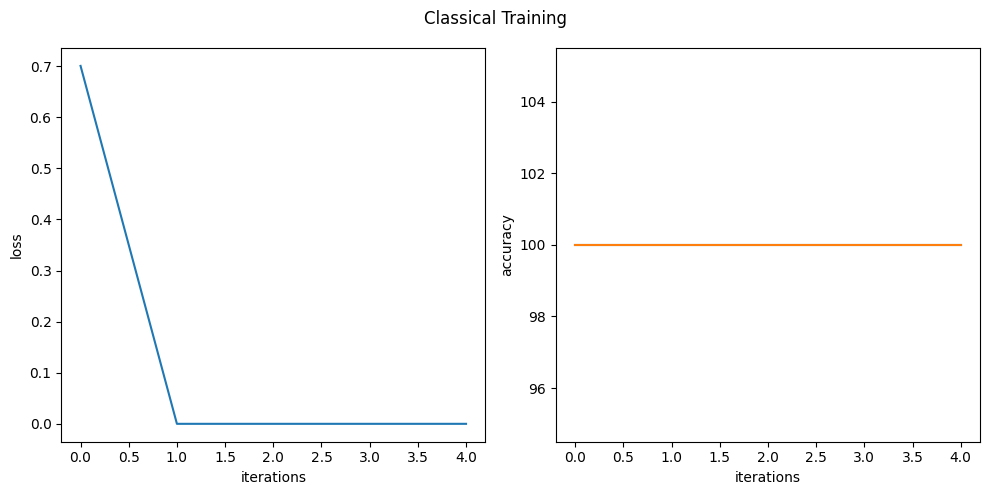

In [7]:
plot_acc_loss("Classical Training", train_acc, test_acc, loss)